#Neural Network HW1 Part3
##Group 2
Saeed Samimi,
marjan Mohammadi,
Mohammd Ali Ahrabi

Dataset 1 - Trained w: [2.01996525] Trained b: [3.20913427] Aadam_error: 3.308915538304003
Dataset 2 - Trained w: [1.98844283] Trained b: [2.87695614] Trained c: [1.94335806] Aadam_error: 4.784867308372225


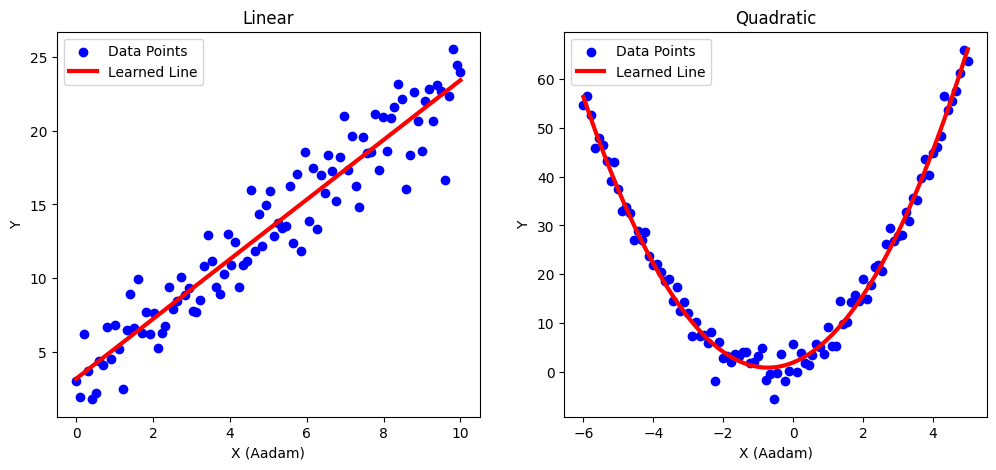

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Define the Mean Squared Error (MSE) function
def mse(x, y, w, b, c=None):
    if c is None:
        y_pred = w * x + b
    else:
        y_pred = w * x ** 2 + b * x + c
    return np.mean((y - y_pred) ** 2)

# Function to train a linear or quadratic regression model using Adam optimizer
def train_model(x, y, epochs, learning_rate, epsilon, is_quadratic=False):
    # Initialize model parameters
    w = np.random.rand(1)
    b = np.random.rand(1)
    c = np.random.rand(1) if is_quadratic else None

    # Initialize Adam optimizer variables
    S_w, S_b, S_c = 0, 0, 0
    V_w, V_b, V_c = 0, 0, 0
    beta1, beta2 = 0.9, 0.999
    delta_w, delta_b, delta_c = 0, 0, 0
    D_w, D_b, D_c = 0, 0, 0

    t = 0

    for epoch in range(epochs):
        t += 1
        random_index = random.randint(0, len(x) - 1)
        x_i, y_i = x[random_index], y[random_index]

        if is_quadratic:
            y_pred = w * x_i ** 2 + b * x_i + c
            error = y_i - y_pred
            dw = -2 * error * x_i ** 2
            db = -2 * error * x_i
            dc = -2 * error
        else:
            y_pred = w * x_i + b
            error = y_i - y_pred
            dw = -error * x_i
            db = -error

        # Update Adam optimizer variables
        D_w = -delta_w * math.copysign(1, dw) * (1 - beta1)
        V_w = beta1 * V_w + (1 - beta1) * dw
        S_w = beta2 * S_w + (1 - beta2) * dw ** 2
        V_hat_w = V_w / (1 - beta1 ** t)
        S_hat_w = S_w / (1 - beta2 ** t)

        D_b = -delta_b * math.copysign(1, db) * (1 - beta1)
        V_b = beta1 * V_b + (1 - beta1) * db
        S_b = beta2 * S_b + (1 - beta2) * db ** 2
        V_hat_b = V_b / (1 - beta1 ** t)
        S_hat_b = S_b / (1 - beta2 ** t)

        if is_quadratic:
            D_c = -delta_c * math.copysign(1, dc) * (1 - beta1)
            V_c = beta1 * V_c + (1 - beta1) * dc
            S_c = beta2 * S_c + (1 - beta2) * dc ** 2
            V_hat_c = V_c / (1 - beta1 ** t)
            S_hat_c = S_c / (1 - beta2 ** t)

            delta_c = (learning_rate / (np.sqrt(S_hat_c) + epsilon)) * V_hat_c + D_c
            c -= delta_c

        delta_w = (learning_rate / (np.sqrt(S_hat_w) + epsilon)) * V_hat_w + D_w
        delta_b = (learning_rate / (np.sqrt(S_hat_b) + epsilon)) * V_hat_b + D_b

        w -= delta_w
        b -= delta_b

    return w, b, c if is_quadratic else None

# Load data from CSV
data1 = pd.read_csv('/content/drive/MyDrive/NN_HW1(data1).csv')
data2 = pd.read_csv('/content/drive/MyDrive/NN_HW1(data2).csv')

# Extract data for the first dataset
x1, y1 = data1.iloc[:, 0], data1.iloc[:, 1]

# Extract data for the second dataset
x2, y2 = data2.iloc[:, 0], data2.iloc[:, 1]

# Set hyperparameters
epochs1 = 10000
epochs2 = 100000
learning_rate1 = 0.01
learning_rate2 = 0.001
epsilon = 1e-8

# Train models for both datasets
w1, b1, _ = train_model(x1, y1, epochs1, learning_rate1, epsilon)
w2, b2, c2 = train_model(x2, y2, epochs2, learning_rate2, epsilon, is_quadratic=True)

# Calculate and print errors
Aadam_error1 = mse(x1, y1, w1, b1)
Aadam_error2 = mse(x2, y2, w2, b2, c2)
print("Dataset 1 - Trained w:", w1, "Trained b:", b1, "Aadam_error:", Aadam_error1)
print("Dataset 2 - Trained w:", w2, "Trained b:", b2, "Trained c:", c2, "Aadam_error:", Aadam_error2)

# Plot the data and the learned lines for both datasets
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Data Points', color='blue')
plt.plot(x1, w1 * x1 + b1, label='Learned Line', color='red', linestyle='-', linewidth=3)
plt.xlabel('X (Aadam)')
plt.ylabel('Y')
plt.title('Linear')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Data Points', color='blue')
plt.plot(x2, w2 * x2 ** 2 + b2 * x2 + c2, label='Learned Line', color='red', linestyle='-', linewidth=3)
plt.xlabel('X (Aadam)')
plt.ylabel('Y')
plt.title('Quadratic')
plt.legend()

plt.show()
